In [1]:
import sample_data_create

In [2]:
X, y = sample_data_create.X, sample_data_create.y

# Data Visualization

In [3]:
import matplotlib.pyplot as plt

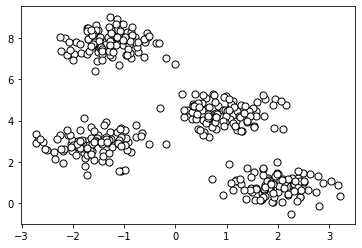

In [4]:
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

# Data  data preprocessing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Determine number of K

In [7]:
def auto_K(distortions):
    des_distortions = []
    for i in range(0, len(distortions)-1):
        if i == 0:
            des_distortions.append(0)
            continue
        des_distortions.append((distortions[i] - distortions[i-1])/distortions[i-1])
    return des_distortions.index(min(des_distortions)) + 1 

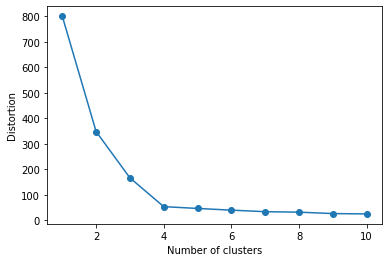

In [8]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_std)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### pick the number of A manually or automatically

In [9]:
try:
    num_of_K = int(input('Please choose number of K based on the elbow method and the graph is shown\n'))
except:
    print ('number of K will be determined automatically')
    num_of_K = auto_K(distortions)

Please choose number of K based on the elbow method and the graph is shown

number of K will be determined automatically


In [10]:
num_of_K

4

# Training the model

In [11]:
number_of_k = 3

km = KMeans(
    n_clusters= num_of_K, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_std)

In [12]:
X_org = scaler.inverse_transform(X_std)
Y = scaler.inverse_transform(km.cluster_centers_)

In [13]:
# result 
#1) a set of cluster id that each point belongs to
#2) coordinates of centroids at the end of iteration.
print('1. cluster id')
for x, y in zip(X_org, y_km):
    print (x, '-------->', y)

print ('\n')

print ('2. coordinates of centroids')
for i in range(0, num_of_K):
    print ('cluster %d:\t' %(i+1), Y[i])

1. cluster id
[3.44421047e-04 6.71279919e+00] --------> 3
[-2.50280606  2.5879364 ] --------> 0
[-2.67121403  3.04362447] --------> 0
[0.74850383 4.31252691] --------> 1
[-2.36751312  2.47339658] --------> 0
[-1.6271912   7.81041797] --------> 3
[2.19522982 0.84858847] --------> 2
[0.16932115 4.19741719] --------> 1
[-1.74649877  3.00855148] --------> 0
[1.81543961 1.20784281] --------> 2
[-0.99922957  7.8223639 ] --------> 3
[2.44189401 0.30572334] --------> 2
[2.11114739 3.57660449] --------> 1
[-2.25017136  3.31803124] --------> 0
[-0.91446873  2.95031031] --------> 0
[3.03322368 1.09271032] --------> 2
[-1.76133611  1.81716162] --------> 0
[1.69546533 0.49116717] --------> 2
[1.1774409  3.96138228] --------> 1
[-1.27755888  3.44186834] --------> 0
[-1.14120104  3.43260168] --------> 0
[-1.98128564  2.70572345] --------> 0
[-1.83707026  7.26536187] --------> 3
[1.05960683 4.62130305] --------> 1
[0.84226839 4.70501553] --------> 1
[-1.97072587  7.23018852] --------> 3
[-0.73105083  

In [14]:
Y

array([[-1.59920898,  2.86006273],
       [ 0.95472047,  4.35791907],
       [ 1.97306689,  0.84915787],
       [-1.26551713,  7.7693112 ]])

# Visualizating the result

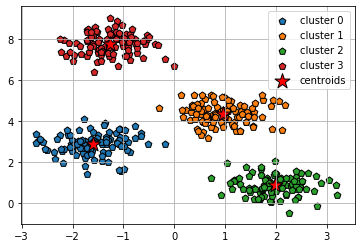

In [15]:
# plot the X and clusters
for i in range(0 ,num_of_K):
    plt.scatter(
        X_org[y_km == i, 0], X_org[y_km == i, 1],
        s=50,
        marker='p', edgecolor='black',
        label='cluster %d' % i
    )

# plot the centroids
plt.scatter(
    Y[:, 0], Y[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()